# Introduction
Hello, I continue to learn from where I left off. I will apply Recurrent Neural Network(RNN) and LSTM models of Deep Learning to the dataset in this work. I will constitute RNN and LSTM models with Keras. After Training, I will visualize the results. I have finished my seventh project about Deep Learning with this work. I will share my previous projects in this section. I started this learning path with data science, then continued with machine learning and now I am improving myself on deep learning. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/medharawat/google-stock-price)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)
- [Logistic Regression, ANN And CNN With Pytorch](https://www.kaggle.com/code/ihsncnkz/logistic-regression-ann-and-cnn-with-pytorch)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Data Review](#1)
- [Data Prepare](#2)
- [Create And Training RNN model](#3)
    - [Predictions And Visualising RNN Model](#4)
- [Long Short Term Memory(LSTM)](#5)
    - [Create And Training LSTM Model](#6)
    - [Predictions And Visualising LSTM Model](#7)
- [CONCLUSION ](#8)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv


# Data Review <a id = "1"></a>
[Go Content](#cont)

I read the dataset with the panda library.

In [2]:
data = pd.read_csv("/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
# Dataset Values(Max, min, std..)
data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [5]:
# Data Correlation: Relationship between columns
data.corr()

,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


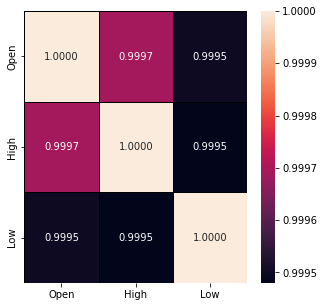

In [6]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In the above section, I look at the relationship between columns of type float64. I tried to change the Close and Volume columns but I got an error because there were unchanging data in these columns.

In [7]:
# Dataset columns names
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# Data Prepare <a id = "2"></a>
[Go Content](#cont)

I separate the data from which I will apply the RNN model from the dataset.

In [8]:
data_set = data.loc[:, ["Open"]].values
data_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

I constitute train and test from the data_set.

In [9]:
train = data_set[:len(data_set) - 50]
test = data_set[len(train):]

train.reshape(train.shape[0],1)
train.shape

(1208, 1)

- I normalize the train dataset.(between zero to one)
- I use the MinMaxScaler function of Sklearn Library.

In [10]:
# Normalization wiht MinmaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) # değerleri 0 ile 1 arasında sayılara indirger
train_scaler = scaler.fit_transform(train)
train_scaler

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

I visualize the train_scaler.

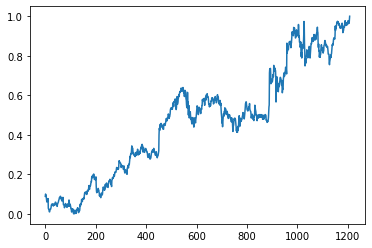

In [11]:
plt.plot(train_scaler)
plt.show()

I create a data structure with 50 timesteps and 1 output.

In [12]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape

(1158, 50, 1)

In [14]:
X_train

array([[[0.08886192],
        [0.10045847],
        [0.09768454],
        ...,
        [0.03806442],
        [0.04646325],
        [0.05245415]],

       [[0.10045847],
        [0.09768454],
        [0.0948143 ],
        ...,
        [0.04646325],
        [0.05245415],
        [0.05399522]],

       [[0.09768454],
        [0.0948143 ],
        [0.08267838],
        ...,
        [0.05245415],
        [0.05399522],
        [0.05811758]],

       ...,

       [[0.9528818 ],
        [0.96871629],
        [0.96698259],
        ...,
        [0.97210664],
        [0.96721375],
        [0.96804207]],

       [[0.96871629],
        [0.96698259],
        [0.97208738],
        ...,
        [0.96721375],
        [0.96804207],
        [0.96447835]],

       [[0.96698259],
        [0.97208738],
        [0.9744953 ],
        ...,
        [0.96804207],
        [0.96447835],
        [0.97998536]]])

In [15]:
Y_train

array([0.05399522, 0.05811758, 0.06025582, ..., 0.96447835, 0.97998536,
       1.        ])

# Create And Training RNN model <a id = "3"></a>
[Go Content](#cont)

**What is The Recurrent Neural Network(RNN)?** <br>
A recurrent neural network (RNN) is a special type of an artificial neural network adapted to work for time series data or data that involves sequences. Ordinary feed forward neural networks are only meant for data points, which are independent of each other. However, if we have data in a sequence such that one data point depends upon the previous data point, we need to modify the neural network to incorporate the dependencies between these data points. RNNs have the concept of ‘memory’ that helps them store the states or information of previous inputs to generate the next output of the sequence.

If you want more information about RNN, [click here.](https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/)

In [16]:
# Import Library 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initialising the RNN
regressor = Sequential()

# Add the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

2022-09-08 14:48:03.725768: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-08 14:48:04.073081: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
37/37 [==============================] - 7s 120ms/step - loss: 0.3160
Epoch 2/100
37/37 [==============================] - 5s 131ms/step - loss: 0.1845
Epoch 3/100
37/37 [==============================] - 4s 117ms/step - loss: 0.1448
Epoch 4/100
37/37 [==============================] - 5s 122ms/step - loss: 0.1031
Epoch 5/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0755
Epoch 6/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0699
Epoch 7/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0645
Epoch 8/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0483
Epoch 9/100
37/37 [==============================] - 5s 136ms/step - loss: 0.0402
Epoch 10/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0386
Epoch 11/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0328
Epoch 12/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0284
Epoch 13/100


## Predictions And Visualising RNN Model <a id = "4"></a>
[Go Content](#cont)

In this chapter, I will check result about RNN model.

I prepare the test dataset.

In [17]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [18]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

I visualize the training result of the test dataset.

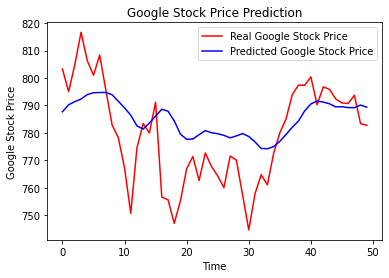

In [19]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# Long Short Term Memory(LSTM) <a id = "5"></a>
[Go Content](#cont)

**What is The Long Shrt Term Memory(LSTM)?**<br>
Long Short Term Memory is a kind of recurrent neural network. In RNN output from the last step is fed as input in the current step. LSTM was designed by Hochreiter & Schmidhuber. It tackled the problem of long-term dependencies of RNN in which the RNN cannot predict the word stored in the long-term memory but can give more accurate predictions from the recent information. As the gap length increases RNN does not give an efficient performance. LSTM can by default retain the information for a long period of time. It is used for processing, predicting, and classifying on the basis of time-series data.

If you want more information about RNN, [click here.](https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/)

## Create And Training LSTM Model <a id = "6"></a>
[Go Content](#cont)

I will prepare the dataset and I will do to train with the LSTM model.

I prepare trainX dataset for LSTM model. I just change its shape.

In [20]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [21]:
# Import Library For LSTM Model
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

I create the LSTM model and I start the training.

In [22]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, timesteps)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50
1158/1158 [==============================] - 3s 2ms/step - loss: 0.0090
Epoch 2/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 3/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 4/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 5/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 6/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 7/50
1158/1158 [==============================] - 2s 2ms/step - loss: 9.6333e-04
Epoch 8/50
1158/1158 [==============================] - 2s 2ms/step - loss: 8.7543e-04
Epoch 9/50
1158/1158 [==============================] - 2s 2ms/step - loss: 9.1002e-04
Epoch 10/50
1158/1158 [==============================] - 2s 2ms/step - loss: 8.0047e-04
Epoch 11/50
1158/1158 [==============================] - 2s 2ms/step - loss: 8.8017e-04
Epoch 12/50
1158/1158 [==============================] - 2s 2ms/s

## Predictions And Visualising LSTM Model <a id = "7"></a>
[Go Content](#cont)

In this chapter, I will check result about LSTM model.

In [23]:
# Prepare test dataset
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# Predict with testX
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

I visualize the training result of the test dataset.

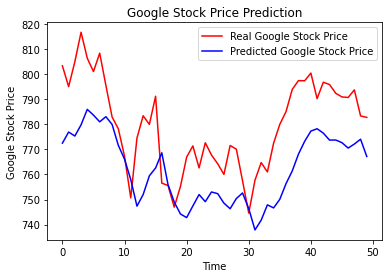

In [24]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# CONCLUSION <a id = "8"></a>
****
[Go Content](#cont) <br>
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.